# Time Series Forecast of Global Climate Crisis


Team 1: Christopher Garcia, Mendelina Lopez

Date: Decemeber 5, 2022

## Load Data


In [ ]:
from pandas import plotting
# Import required packages
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm

# Time series and machine learning packages needed for modeling:
import statsmodels.api as sm 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GlobalLandTemperaturesByMajorCity.csv to GlobalLandTemperaturesByMajorCity.csv


In [ ]:
# Loading dataset through download
climate_df = pd.read_csv(io.BytesIO(uploaded['GlobalLandTemperaturesByMajorCity.csv']),index_col='dt', parse_dates=True)
climate_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
# Load and inspect dataset, I have it in my downloads 
climate_df = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv', index_col='dt', parse_dates=True)
climate_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             228175 non-null  float64
 1   AverageTemperatureUncertainty  228175 non-null  float64
 2   City                           239177 non-null  object 
 3   Country                        239177 non-null  object 
 4   Latitude                       239177 non-null  object 
 5   Longitude                      239177 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


In [ ]:
climate_df.index

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=239177, freq=None)

## Exploratory Data Analysis

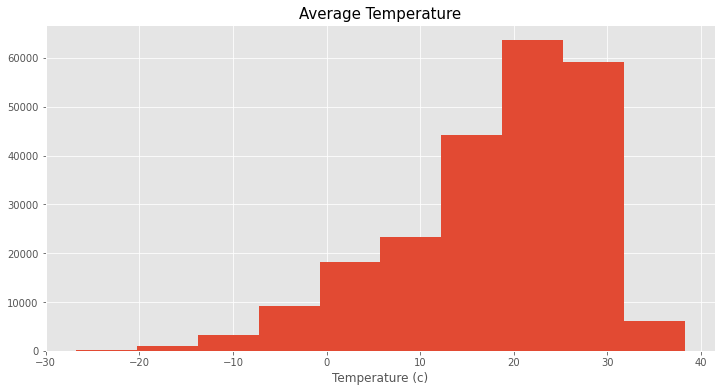

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(climate_df.AverageTemperature)
plt.title('Average Temperature', fontsize= 15)
#plt.ylabel('', fontsize=13)
plt.xlabel('Temperature (c)', fontsize=12)
plt.show()

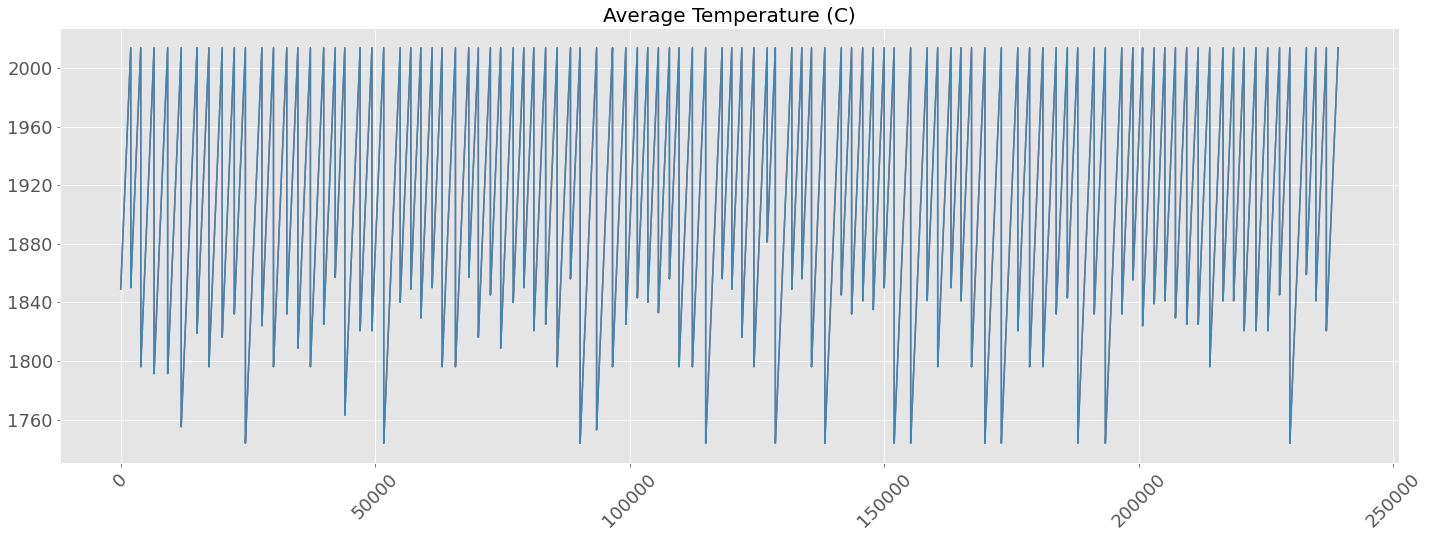

In [ ]:
plt.figure(figsize=(24,8))
plt.plot(climate_df.index)
plt.title('Average Temperature (C)', fontsize=20)
plt.xticks(rotation = 45)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(climate_df.index)
plt.show()

Text(0, 0.5, 'AverageTemperature')

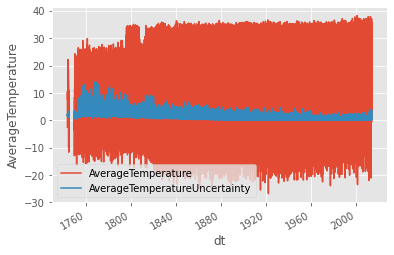

In [ ]:
# viewing the full data
climate_df.plot()
plt.ylabel('AverageTemperature')

Text(0, 0.5, 'AverageTemperature')

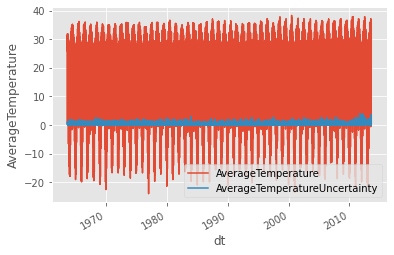

In [ ]:
# Viewing the past 50 years
fiftyyrs = climate_df['1963-09-01':'2013-09-01']

fiftyyrs.plot()
plt.ylabel('AverageTemperature')

Text(0, 0.5, 'AverageTemperature')

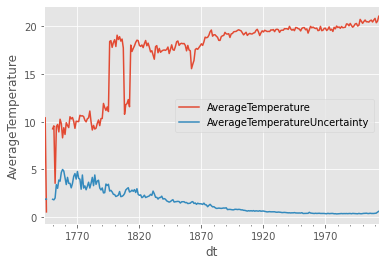

In [ ]:
# visualizing the average of each year so that the graph is not so condensed
climate_yrly = climate_df.resample('Y').mean()

climate_yrly.plot()
plt.ylabel('AverageTemperature')

## Data Transformation and Pre-processing

In [ ]:
# Create a copy of dataframe 
new_df = climate_df.copy()
#new_df.head()
# Convert Celsius to Fahrenheit
new_df['AverageTemperature(F)'] = new_df.apply(lambda x: (9/5) * x['AverageTemperature'] + 32, axis=1)
new_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,AverageTemperature(F)
dt,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,80.0672
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,81.3812
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,82.5818
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,79.0520
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,77.7686


In [ ]:
new_df.isnull().sum()

AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
AverageTemperature(F)            11002
dtype: int64

In [ ]:
# Imputing with linear interpolation
imputed_df = new_df.interpolate(method='linear')
imputed_df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
AverageTemperature(F)            0
dtype: int64

In [ ]:
 # View countries with highest temperature counts
 new_df['Country'].value_counts()

India                                 36582
China                                 35444
Brazil                                12930
Turkey                                 9473
United States                          8455
Egypt                                  7589
Pakistan                               7355
Russia                                 6478
Canada                                 6478
Nigeria                                5763
Colombia                               4542
Indonesia                              4530
Australia                              4146
Saudi Arabia                           4098
Japan                                  4095
South Africa                           3762
Spain                                  3239
France                                 3239
United Kingdom                         3239
Italy                                  3239
Ukraine                                3239
Germany                                3239
Morocco                         

In [ ]:
countRatio_temp = new_df.groupby('Country')['AverageTemperature(F)'].value_counts(normalize=True)  # Returns percentages
countRatio_temp

Country      AverageTemperature(F)
Afghanistan  37.2992                  0.001414
             37.3964                  0.001414
             38.8238                  0.001414
             58.1144                  0.001414
             75.1298                  0.001414
                                        ...   
Zimbabwe     77.6030                  0.000592
             77.9522                  0.000592
             77.9882                  0.000592
             78.0170                  0.000592
             78.4904                  0.000592
Name: AverageTemperature(F), Length: 168023, dtype: float64

In [ ]:
# Group by highest temp
new_df.groupby('Country')['AverageTemperature(F)'].max().sort_values(ascending=False)

Country
Iraq                                  100.9094
Saudi Arabia                          100.1462
India                                  97.6586
Pakistan                               97.4228
Sudan                                  96.2600
Nigeria                                91.5224
Syria                                  90.7322
Burma                                  89.5280
China                                  88.2194
Thailand                               88.0070
Egypt                                  87.3806
Vietnam                                87.2636
Bangladesh                             87.2042
Somalia                                86.4608
Philippines                            86.3618
Brazil                                 85.9748
Côte D'Ivoire                          85.8614
Turkey                                 85.7210
Indonesia                              85.2944
Taiwan                                 85.1108
Senegal                                84.6104
Unite

In [ ]:
# Group city by average temperature
new_df.groupby('City')['AverageTemperature(F)'].max().sort_values(ascending=False)

City
Baghdad        100.9094
Riyadh         100.1462
Jaipur          97.6586
Lahore          97.4228
Faisalabad      97.4228
                 ...   
Addis Abeba     70.2014
Mexico          69.8000
London          69.3374
Nairobi         67.0028
Santiago        57.0524
Name: AverageTemperature(F), Length: 100, dtype: float64

### Time Series for Single City 



In [ ]:
# Retrieve all records for a single city, Mexico
mexico_data = imputed_df[imputed_df['City'] == 'Mexico']
mexico_data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,AverageTemperature(F)
dt,,,,,,,
1835-01-01,13.086,1.942,Mexico,Mexico,20.09N,98.96W,55.5548
1835-02-01,12.322,2.020,Mexico,Mexico,20.09N,98.96W,54.1796
1835-03-01,13.874,2.271,Mexico,Mexico,20.09N,98.96W,56.9732
1835-04-01,16.312,2.247,Mexico,Mexico,20.09N,98.96W,61.3616
1835-05-01,16.851,1.893,Mexico,Mexico,20.09N,98.96W,62.3318


In [ ]:
# Remove columns 
drop_cols = ['AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']
mexico_data.drop(drop_cols, axis=1, inplace=True)
mexico_data.head()

,AverageTemperature(F)
dt,
1835-01-01,55.5548
1835-02-01,54.1796
1835-03-01,56.9732
1835-04-01,61.3616
1835-05-01,62.3318


In [ ]:
mexico_data = mexico_data['1970': '2012']
mexico_data.head()

,AverageTemperature(F)
dt,
1970-01-01,53.3282
1970-02-01,55.3208
1970-03-01,61.1204
1970-04-01,66.8444
1970-05-01,64.6970


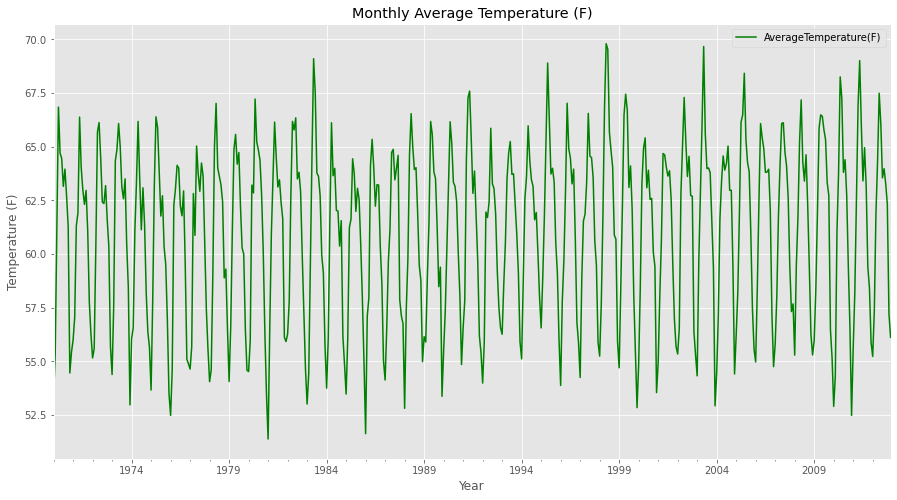

In [ ]:
mexico_data.plot(figsize=(15,8), color='green')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Monthly Average Temperature (F)')
plt.show()

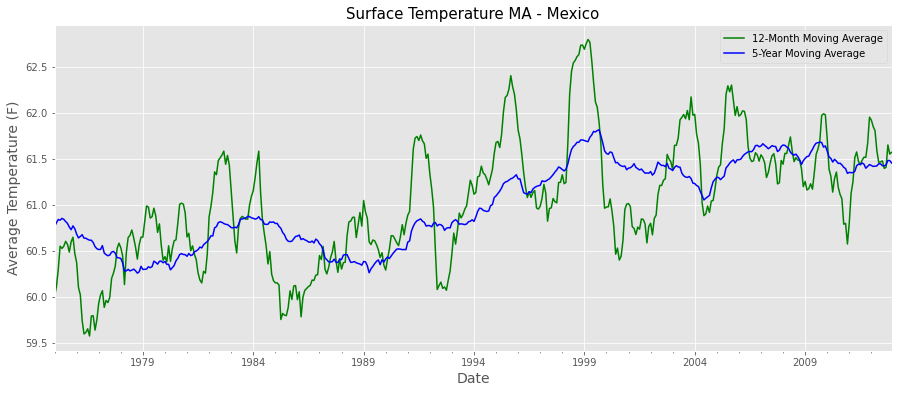

In [ ]:
year = mexico_data['AverageTemperature(F)'].rolling(window = 12).mean()
five_yearly = mexico_data['AverageTemperature(F)'].rolling(window = 60).mean()
MAax = year['1975':].plot(figsize = (15, 6), label = '12-Month Moving Average', color='green')
five_yearly['1975':].plot(ax = MAax, label = '5-Year Moving Average', color='blue')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Average Temperature (F)', fontsize = 14)
plt.title('Surface Temperature MA - Mexico', fontsize = 15)
plt.legend()

plt.show()

## Models

### SARIMA Model

In [ ]:
# Prep data for modeling
target = mexico_data['AverageTemperature(F)'].resample('MS').mean()

# Split dataset 
target_train = target[:'2009']
test_target = target['2010':]

In [ ]:
# Build SARIMA model due to seasonality in the data
arima_model = SARIMAX(target_train, order = (1, 0, 1))
arima_fit = arima_model.fit(method='nm')

In [ ]:
# Model results
print('SARIMA Model Summary:')
arima_fit.summary()

SARIMA Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     AverageTemperature(F)   No. Observations:                  480
Model:                  SARIMAX(1, 0, 1)   Log Likelihood               -1130.100
Date:                   Sun, 04 Dec 2022   AIC                           2266.200
Time:                           22:49:44   BIC                           2278.722
Sample:                       01-01-1970   HQIC                          2271.122
                            - 12-01-2009                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.003    386.984      0.000       0.993       1.003
ma.L1          0.3000      0.047      6.425      0.000       0.208       0.391
sigma2         6.4094      0.423     15.137      0.000       5.580       7.239
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                 4.33
Prob(Q):                              0.20   Prob(JB):                         0.11
Heteroskedasticity (H):               0.84   Skew:                             0.23
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Model forecast using testing data
forecast = arima_fit.get_forecast(steps=36)

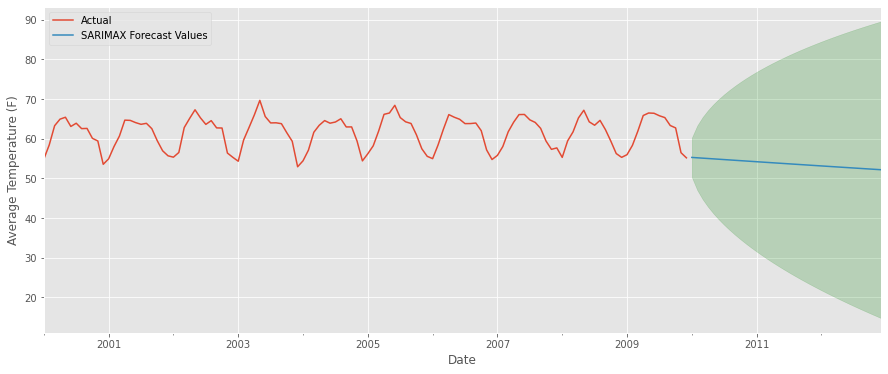

In [ ]:
# Plot forecast and atual values
ax1 = target_train['2000':].plot(label='Actual')
forecast.predicted_mean.plot(ax=ax1, label='SARIMAX Forecast Values', figsize=(15, 6))

# Confidence intervals of the forecasts
ci = forecast.conf_int()
ax1.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], alpha=0.2, color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature (F)')
plt.legend(loc = 'upper left')

plt.show()

In [ ]:
# Evaluate SARIMA model
forecast_pred = forecast.predicted_mean

mse = ((forecast_pred - test_target) ** 2).mean()
print('Mean Squared Error SARIMAX forecast: {}'.format(round(mse, 2)))
print('Root Mean Squared Error SARIMAX forecast: {}'.format(round(np.sqrt(mse), 2)))

Mean Squared Error SARIMAX forecast: 80.36
Root Mean Squared Error SARIMAX forecast: 8.96


### Simple Exponential Smoothing

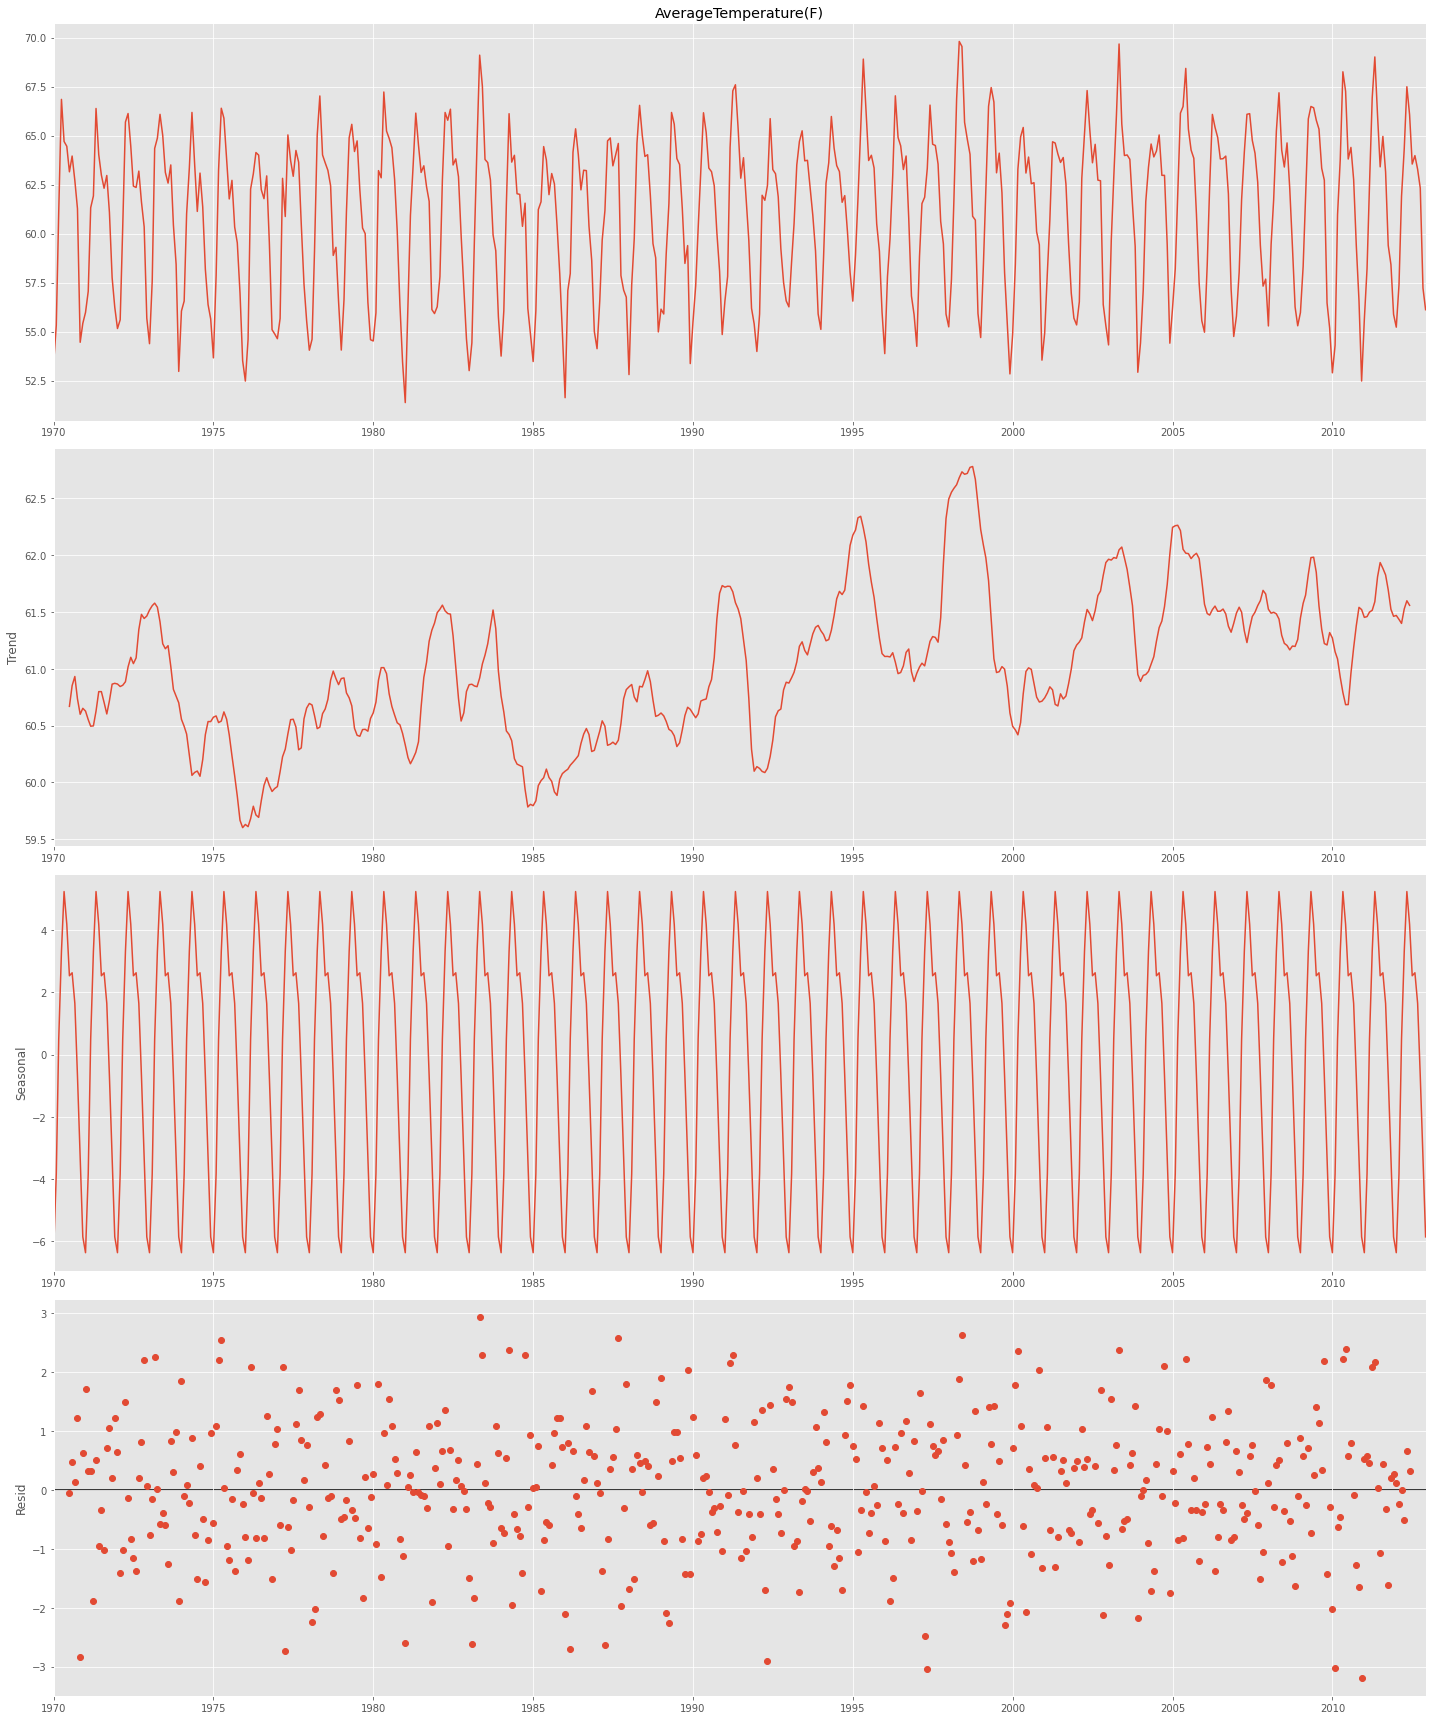

In [ ]:
# Decomposition
rcParams['figure.figsize'] = 20,24
STR = sm.tsa.seasonal_decompose(target) 
fig = STR.plot()
plt.show()

In [ ]:
# Defining the Exponential Smoothing Model
def timeseries_evaluation(y_true, y_pred):  
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

In [ ]:
# Fitting the Model
SES = SimpleExpSmoothing(np.asarray(target_train))
fit_SES = SES.fit(smoothing_level = 1, optimized=False)

func_pred = fit_SES.forecast(len(test_target))
timeseries_evaluation(test_target, func_pred)

Evaluation metric results: 
MSE is : 58.75094564999996
RMSE is : 7.6649165455339405


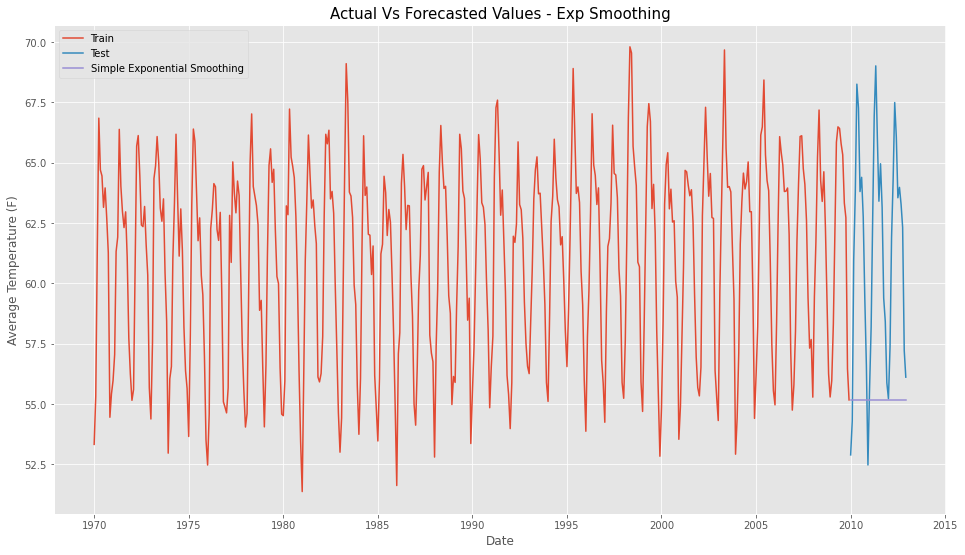

In [ ]:
# Setting the predicted values into a dataframe
df_func_pred = pd.DataFrame(func_pred, columns=['Close_grid_Search'])
df_func_pred["dt"] = test_target.index
df_func_pred = df_func_pred.set_index("dt")
df_func_pred.head()

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(target_train, label='Train')
plt.plot(test_target, label='Test')
plt.plot(df_func_pred, label='Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Average Temperature (F)')
plt.title('Actual Vs Forecasted Values - Exp Smoothing', fontsize = 15)
plt.legend()
plt.show()